In [2]:
import pandas as pd

In [3]:
data_2016 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_2016.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
data_2017 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_2017.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
data_2018 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_2018.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
data_2019 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_2019.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

In [4]:
playoff_teams_2016 = ['LV', 'DET', 'NYG', 'MIA', 'SEA', 'HOU', 'DAL', 'KC', 'GB', 'PIT', 'ATL', 'NE']
playoff_teams_2017 = ['LA', 'KC', 'BUF', 'CAR', 'TEN', 'ATL', 'NO', 'PIT', 'JAX', 'MIN', 'NE', 'PHI']
playoff_teams_2018 = ['HOU', 'SEA', 'CHI', 'BAL', 'IND', 'DAL', 'PHI', 'LAC', 'KC', 'NO', 'LA', 'NE']
playoff_teams_2019 = ['BUF', 'NE', 'NO', 'PHI', 'MIN', 'BAL', 'SEA', 'HOU', 'TEN', 'GB', 'SF', 'KC']

In [5]:
data_2016 = data_2016.loc[(data_2016.defteam.isin(playoff_teams_2016)) | (data_2016.week > 17)]
data_2017 = data_2017.loc[(data_2017.defteam.isin(playoff_teams_2017)) | (data_2017.week > 17)]
data_2018 = data_2018.loc[(data_2018.defteam.isin(playoff_teams_2018)) | (data_2018.week > 17)]
data_2019 = data_2019.loc[(data_2019.defteam.isin(playoff_teams_2019)) | (data_2019.week > 17)]

In [6]:
data = pd.DataFrame()
data = data.append(data_2016, sort=True)
data = data.append(data_2017, sort=True)
data = data.append(data_2018, sort=True)
data = data.append(data_2019, sort=True)

In [7]:
data.head

<bound method NDFrame.head of         air_epa   air_wpa  air_yards  assist_tackle  \
342         NaN       NaN        NaN            0.0   
343   -0.547492 -0.022095        2.0            1.0   
344         NaN       NaN        NaN            1.0   
345         NaN       NaN        NaN            0.0   
346    2.038900  0.024928       11.0            0.0   
347    1.862146  0.060540       25.0            0.0   
348         NaN       NaN        NaN            0.0   
349         NaN       NaN        NaN            0.0   
350         NaN       NaN        NaN            0.0   
351         NaN       NaN        NaN            0.0   
352         NaN       NaN        NaN            0.0   
360         NaN       NaN        NaN            1.0   
361   -0.855053 -0.016615       -1.0            0.0   
362   -0.512345  0.000000        4.0            0.0   
363         NaN       NaN        NaN            0.0   
380         NaN       NaN        NaN            0.0   
381   -0.054199  0.000000        4.

In [7]:
data = data.loc[(data.qb_dropback == 1) & (data.epa.isna()==False) & (data.cpoe.isna()==False)]
data.head()

,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,...,wp,wpa,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
343,-0.570661,-0.030733,2.0,1.0,32013030-2d30-3033-3135-35337f677217,B.McKinney,HOU,32013030-2d30-3032-3639-3931fc2487a0,B.Cushing,HOU,...,0.495600,0.004907,1.124739,0.035640,71.0,4.0,6.0,75.0,6,CHI 29
346,2.088528,0.080507,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.460741,0.087516,0.096310,0.007009,62.0,2.0,13.0,75.0,7,CHI 38
347,1.857485,0.025676,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548257,0.048541,0.193208,0.022865,49.0,4.0,29.0,75.0,10,HOU 49
361,-0.878749,-0.008217,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.772109,-0.016831,0.185065,-0.008614,36.0,NaN,0.0,9.0,6,HOU 36
362,-0.598012,-0.008631,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.755278,0.000157,0.381370,0.008787,36.0,1.0,5.0,9.0,6,HOU 36


In [8]:
qbs = data.groupby(['passer', 'posteam'], as_index=False).agg({'epa': 'mean',
                                                               'cpoe': 'mean',
                                                               'play_id': 'count'})

In [9]:
qbs

,passer,posteam,epa,cpoe,play_id
0,A.Dalton,CIN,0.085796,-3.017155,757
1,A.Luck,IND,0.151486,-2.623729,514
2,A.McCarron,CIN,0.149114,-17.087788,6
3,A.McCarron,HOU,0.143811,-6.021114,33
4,A.Rodgers,GB,0.321558,2.707678,866
5,A.Smith,KC,0.227159,3.349718,350
6,A.Smith,WAS,-0.036732,-3.402825,131
7,A.Wilson,MIA,0.473031,-8.182386,2
8,B.Allen,DEN,-0.140263,-18.939879,59
9,B.Bortles,JAX,0.006111,-6.319518,651


In [10]:
len(data_2016)

17843

In [11]:
len(qbs)

187

In [12]:
qbs = qbs[qbs.play_id > 199]
qbs

,passer,posteam,epa,cpoe,play_id
0,A.Dalton,CIN,0.085796,-3.017155,757
1,A.Luck,IND,0.151486,-2.623729,514
4,A.Rodgers,GB,0.321558,2.707678,866
5,A.Smith,KC,0.227159,3.349718,350
9,B.Bortles,JAX,0.006111,-6.319518,651
18,B.Mayfield,CLE,0.001322,-2.459594,432
20,B.Osweiler,HOU,-0.009817,-2.608425,240
23,B.Roethlisberger,PIT,0.204839,1.539950,820
29,C.Keenum,DEN,0.097476,-0.263967,291
31,C.Keenum,MIN,0.104893,0.747175,232


In [13]:
len(qbs)

45

In [14]:
qbs.columns = ['Player', 'Team', 'EPA per dropback', 'CPOE', 'Dropbacks']

In [15]:
qbs

,Player,Team,EPA per dropback,CPOE,Dropbacks
0,A.Dalton,CIN,0.085796,-3.017155,757
1,A.Luck,IND,0.151486,-2.623729,514
4,A.Rodgers,GB,0.321558,2.707678,866
5,A.Smith,KC,0.227159,3.349718,350
9,B.Bortles,JAX,0.006111,-6.319518,651
18,B.Mayfield,CLE,0.001322,-2.459594,432
20,B.Osweiler,HOU,-0.009817,-2.608425,240
23,B.Roethlisberger,PIT,0.204839,1.539950,820
29,C.Keenum,DEN,0.097476,-0.263967,291
31,C.Keenum,MIN,0.104893,0.747175,232


In [28]:
qbs.loc['Player' == 'A.Dalton']

KeyError: False

In [17]:
team_colors_primary = {"TB": "#D50A0A", "DET": "#0076b6", "TEN": "#0C2340", "BAL": "#241773",
                       "GB": "#FFB612", "MIA": "#FC4C02", "DAL": "#041E42", "BUF": "#00338D",
                       "CLE": "#311D00", "HOU": "#03202f", "WAS": "#FFB612", "LAC": "#0080C6",
                       "CHI": "#c83803", "KC": "#E31837", "NYJ": "#125740", "PHI": "#004C54",
                       "NYG": "#0B2265", "IND": "#002C5F", "ATL": "#000000", "MIN": "#4F2683",
                       "CAR": "#0085CA", "CIN": "#fb4f14", "LA": "#866D4B", "ARI": "#000000",
                       "NE": "#B0B7BC", "SF": "#B3995D", "LV": "#A5ACAF", "JAX": "#006778",
                       "PIT": "#FFB612", "NO": "#D3BC8D", "DEN": "#FB4F14", "SEA": "#69BE28",
                       }
team_colors_secondary = {"TB": "#FF7900", "DET": "#B0B7BC", "TEN": "#4B92DB", "BAL": "#000000",
                         "GB": "#203731", "MIA": "#008E97", "DAL": "#869397", "BUF": "#C60C30",
                         "CLE": "#ff3c00", "HOU": "#A71930", "WAS": "#773141", "LAC": "#FFC20E",
                         "CHI": "#0B162A", "KC": "#FFB81C", "NYJ": "#000000", "PHI": "#000000",
                         "NYG": "#a71930", "IND": "#A2AAAD", "ATL": "#a71930", "MIN": "#FFC62F",
                         "CAR": "#BFC0BF", "CIN": "#000000", "LA": "#002244", "ARI": "#97233F",
                         "NE": "#002244", "SF": "#AA0000", "LV": "#000000", "JAX": "#9F792C",
                         "PIT": "#101820", "NO": "#101820", "DEN": "#002244", "SEA": "#002244",
                         }

In [18]:
qb_list = []
for qb in range(len(qbs)):
    qb_list.append(qbs.iloc[qb]['Player'])
qb_list

['A.Dalton',
 'A.Luck',
 'A.Rodgers',
 'A.Smith',
 'B.Bortles',
 'B.Mayfield',
 'B.Osweiler',
 'B.Roethlisberger',
 'C.Keenum',
 'C.Keenum',
 'C.Newton',
 'C.Palmer',
 'C.Wentz',
 'D.Brees',
 'D.Carr',
 'D.Prescott',
 'D.Watson',
 'E.Manning',
 'J.Allen',
 'J.Brissett',
 'J.Cutler',
 'J.Flacco',
 'J.Garoppolo',
 'J.Goff',
 'J.McCown',
 'J.Winston',
 'K.Allen',
 'K.Cousins',
 'K.Cousins',
 'L.Jackson',
 'M.Mariota',
 'M.Ryan',
 'M.Stafford',
 'M.Trubisky',
 'N.Foles',
 'P.Mahomes',
 'P.Rivers',
 'R.Fitzpatrick',
 'R.Fitzpatrick',
 'R.Wilson',
 'S.Bradford',
 'S.Darnold',
 'T.Brady',
 'T.Siemian',
 'T.Taylor']

In [19]:
team_list = []
for qb in range(len(qbs)):
    team_list.append(qbs.iloc[qb]['Team'])
team_list

['CIN',
 'IND',
 'GB',
 'KC',
 'JAX',
 'CLE',
 'HOU',
 'PIT',
 'DEN',
 'MIN',
 'CAR',
 'ARI',
 'PHI',
 'NO',
 'LV',
 'DAL',
 'HOU',
 'NYG',
 'BUF',
 'IND',
 'MIA',
 'BAL',
 'SF',
 'LA',
 'NYJ',
 'TB',
 'CAR',
 'MIN',
 'WAS',
 'BAL',
 'TEN',
 'ATL',
 'DET',
 'CHI',
 'PHI',
 'KC',
 'LAC',
 'MIA',
 'NYJ',
 'SEA',
 'MIN',
 'NYJ',
 'NE',
 'DEN',
 'BUF']

In [20]:
epa_list = []
for qb in range(len(qbs)):
    epa_list.append(qbs.iloc[qb]['EPA per dropback'])
epa_list

[0.08579647535072057,
 0.15148645678246614,
 0.321557992244922,
 0.22715908887113395,
 0.006111100681151998,
 0.0013216729254623837,
 -0.009816814948682133,
 0.20483875018562026,
 0.09747564081589556,
 0.10489320065387465,
 0.08977139256683674,
 0.11999965708580235,
 0.12559464851639468,
 0.28967368827045503,
 0.08307492529939572,
 0.1677881834446065,
 0.27173952710450694,
 0.14435392698327237,
 -0.03930139234055619,
 0.08068661253201048,
 0.006216583087430346,
 0.07878571957255535,
 0.37260363158635873,
 0.12917657869969437,
 0.1842150676061477,
 0.22472475627617297,
 0.18445025625578407,
 0.09545648600299557,
 0.28501622567186224,
 0.2700569307216729,
 0.25780294281281196,
 0.2382468287769089,
 0.18748674960911083,
 -0.056510819885516816,
 0.37103401139269626,
 0.3906792990445441,
 0.19237842394750942,
 0.09055379262461218,
 -0.13491859652601856,
 0.22074171410746946,
 0.2844024775209231,
 0.03765060051894848,
 0.24618711791223138,
 0.03269800666930617,
 0.15760545934968223]

In [21]:
cpoe_list = []
for qb in range(len(qbs)):
    cpoe_list.append(qbs.iloc[qb]['CPOE'])
cpoe_list

[-3.0171549186366393,
 -2.623728636637736,
 2.7076780882085445,
 3.349717770303999,
 -6.319518014216387,
 -2.459594014066237,
 -2.608425294359525,
 1.5399501981531702,
 -0.26396668653717537,
 0.7471754761605427,
 -3.5815318635964797,
 -1.9469249248504639,
 0.012917698283369342,
 3.9070752426618482,
 0.3231667872716689,
 -0.3059282698887307,
 2.5301165317427623,
 -1.7944854008557818,
 -8.994651206931156,
 -3.7986198084176084,
 -4.3350629968407715,
 -1.5033348969860223,
 1.1287536427199123,
 -2.4230677317949683,
 5.616393521591857,
 1.6376266923223382,
 -2.0839683387590493,
 0.5186375593993723,
 4.448496364829946,
 -4.879040554749159,
 2.926734525589306,
 2.530331824134296,
 -3.3401061882491874,
 -6.946764555561956,
 5.489097265702374,
 1.9832316062242163,
 0.50616836919593,
 1.8451881350822819,
 -3.4694268306096396,
 4.089267582728945,
 6.914715816577275,
 -1.4136636078357696,
 1.2964373837364676,
 -5.692316662181508,
 0.01156961327881986]

In [22]:
dropbacks_list = []
for qb in range(len(qbs)):
    dropbacks_list.append(qbs.iloc[qb]['Dropbacks'])
dropbacks_list

[757,
 514,
 866,
 350,
 651,
 432,
 240,
 820,
 291,
 232,
 590,
 250,
 768,
 984,
 845,
 894,
 584,
 743,
 293,
 361,
 243,
 526,
 332,
 918,
 273,
 857,
 276,
 492,
 482,
 281,
 554,
 1028,
 833,
 518,
 265,
 561,
 946,
 206,
 210,
 870,
 300,
 250,
 1148,
 275,
 394]

In [23]:
from matplotlib import pyplot as plt
import numpy as np

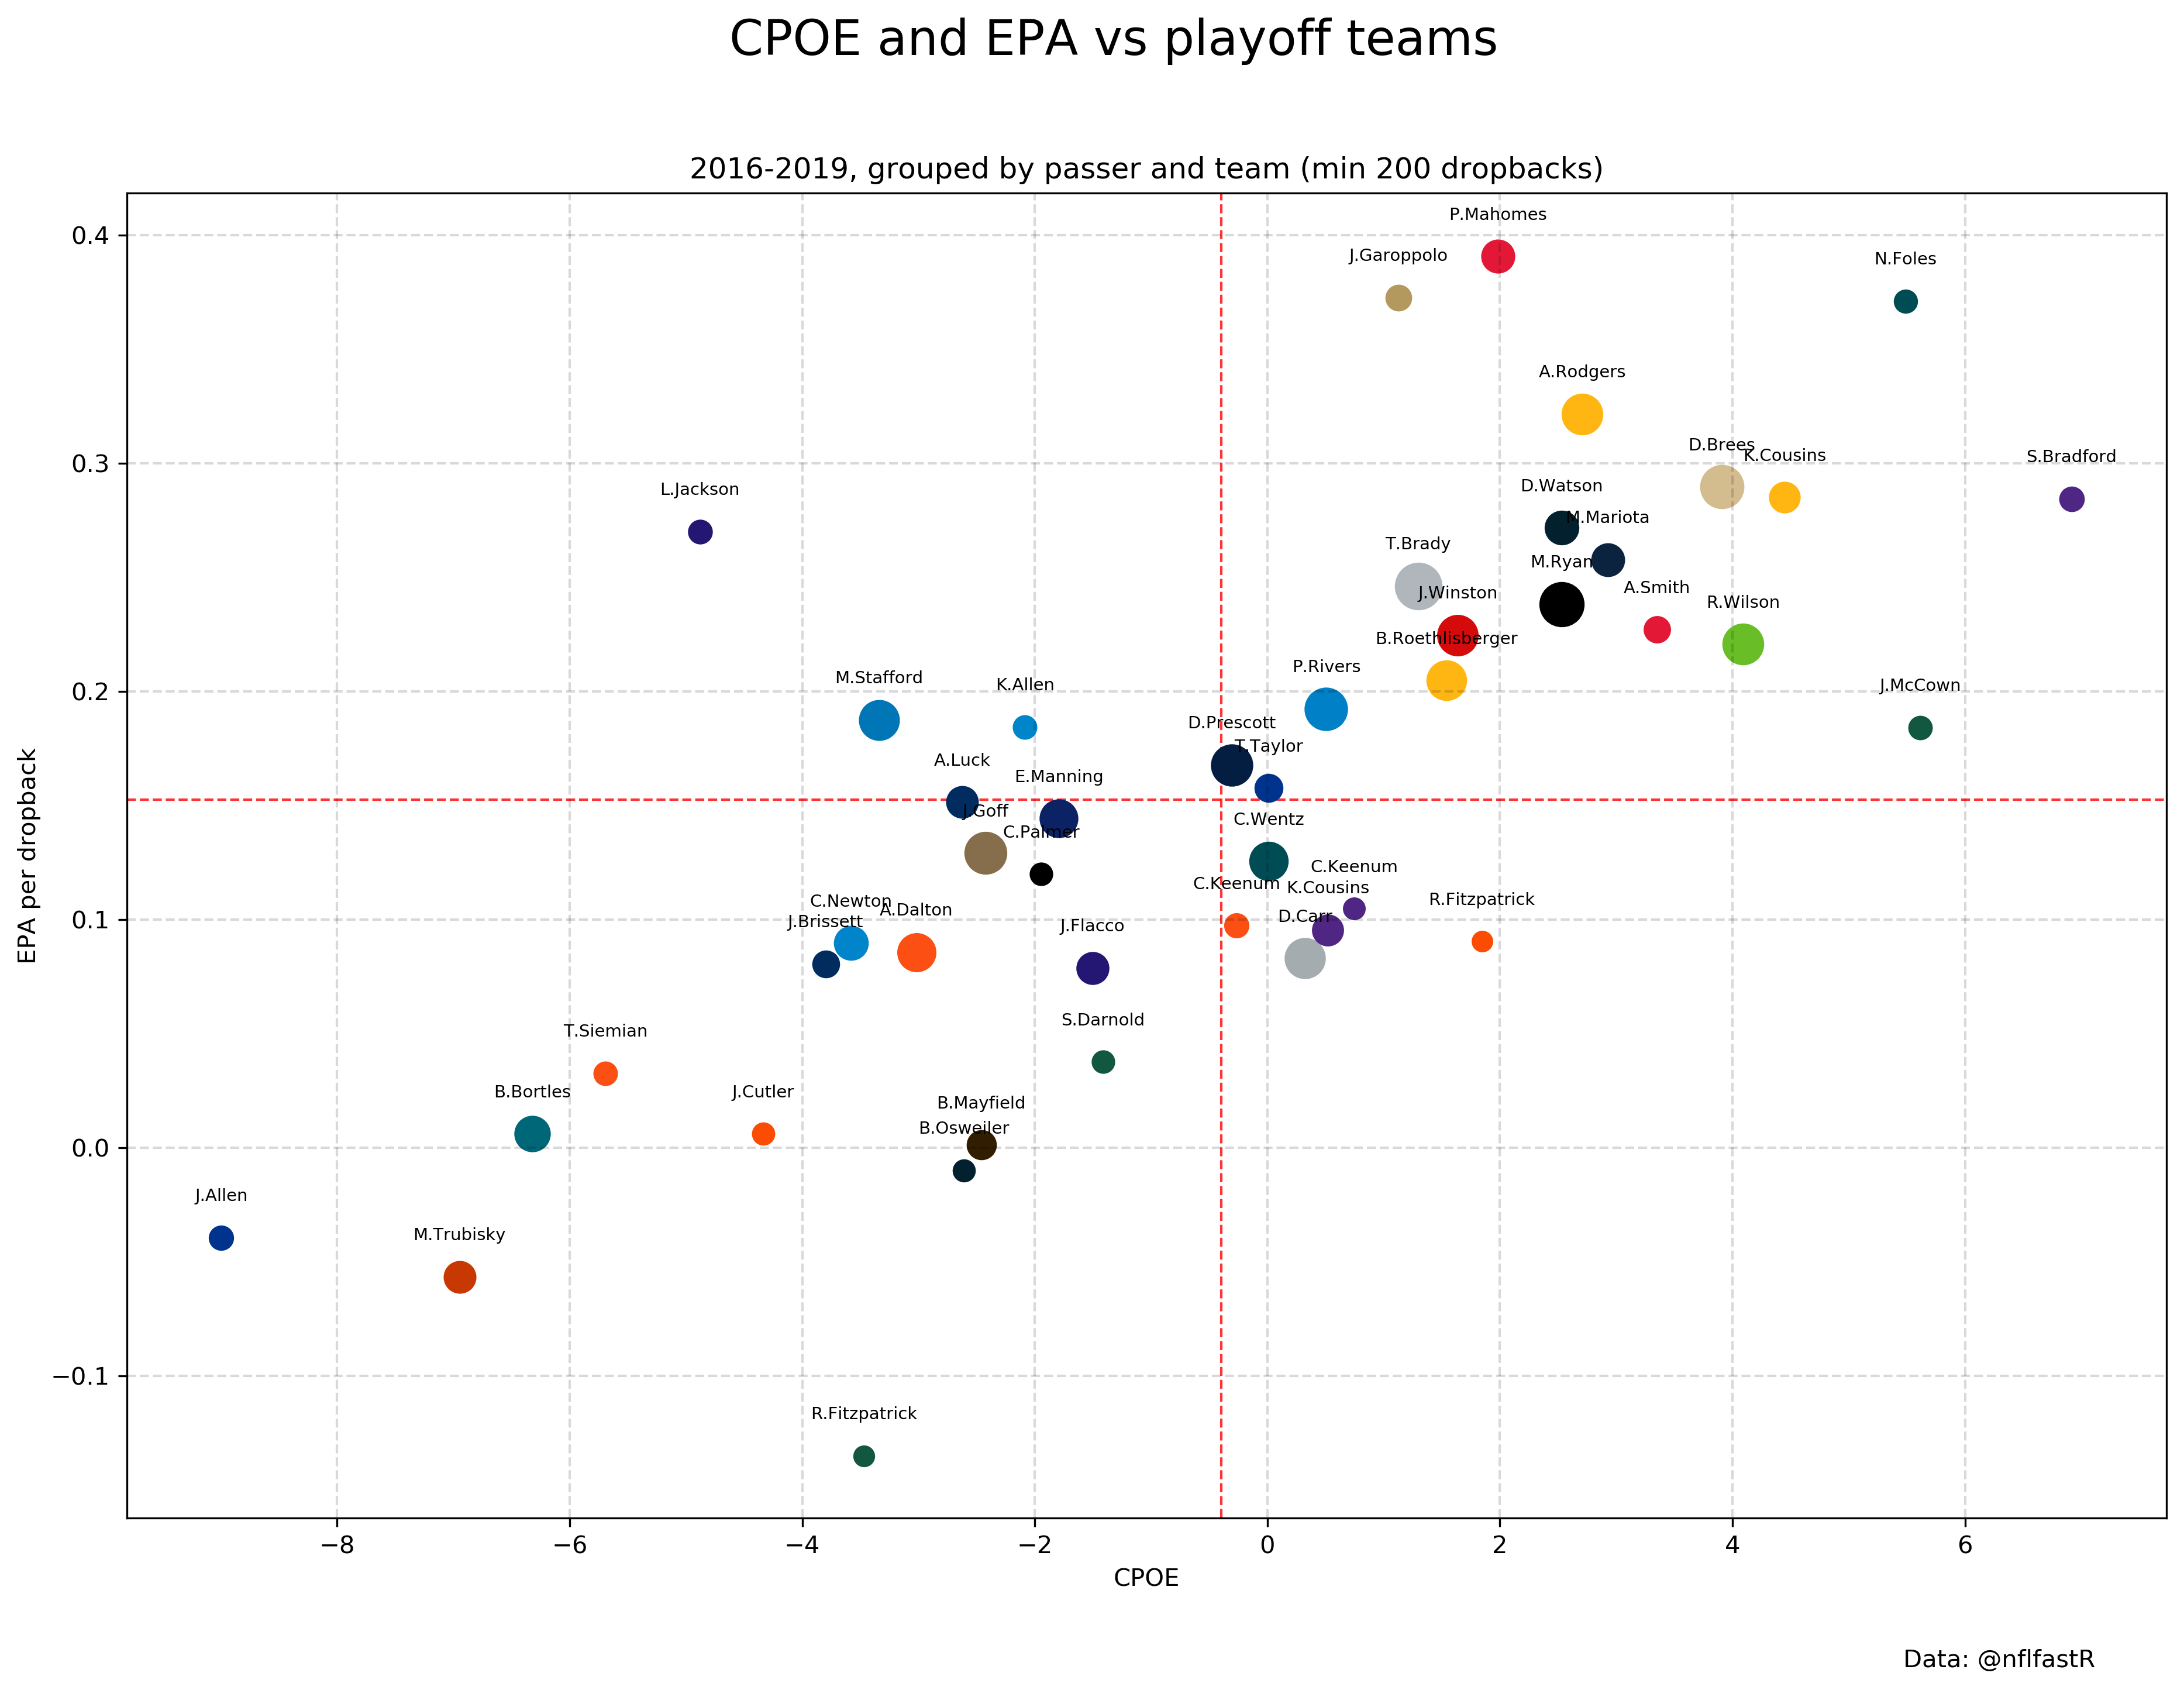

In [24]:
# my original graph on twitter weighted each qb equally 
#     (as opposed to weighting each dropback equally) to make the average lines

# this graph is slightly different from my original graph
#     qb_dropback == 1 instead of earlier (isna() == False)
#     it doesn't make a huge difference, because it was originally 
#       filtered for plays with cpoe data (which are mostly qb passes anyway)

scale = 0.3
mean_epa = np.average(epa_list)
mean_cpoe = np.average(cpoe_list)
plt.figure(figsize=(15,10), dpi=300)
for i in range(len(qbs)):
    color = team_colors_primary[team_list[i]]
    plt.scatter(cpoe_list[i], epa_list[i], dropbacks_list[i]*scale, color)
    plt.annotate(qb_list[i], (cpoe_list[i], epa_list[i]), textcoords='offset points', fontsize=7, xytext=(0,15), ha='center')
plt.axvline(mean_cpoe, color='r', linestyle='--', linewidth='1', alpha=0.8, zorder=0)
plt.axhline(mean_epa, color='r', linestyle='--', linewidth='1', alpha=0.8, zorder=0)
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.15)
plt.suptitle('CPOE and EPA vs playoff teams', fontsize=20)
plt.title('2016-2019, grouped by passer and team (min 200 dropbacks)')
plt.xlabel('CPOE')
plt.ylabel('EPA per dropback')
plt.figtext(.8,.04,'Data: @nflfastR', fontsize=10)
plt.savefig('against_playoff_teams_unweighted.png')
plt.show()

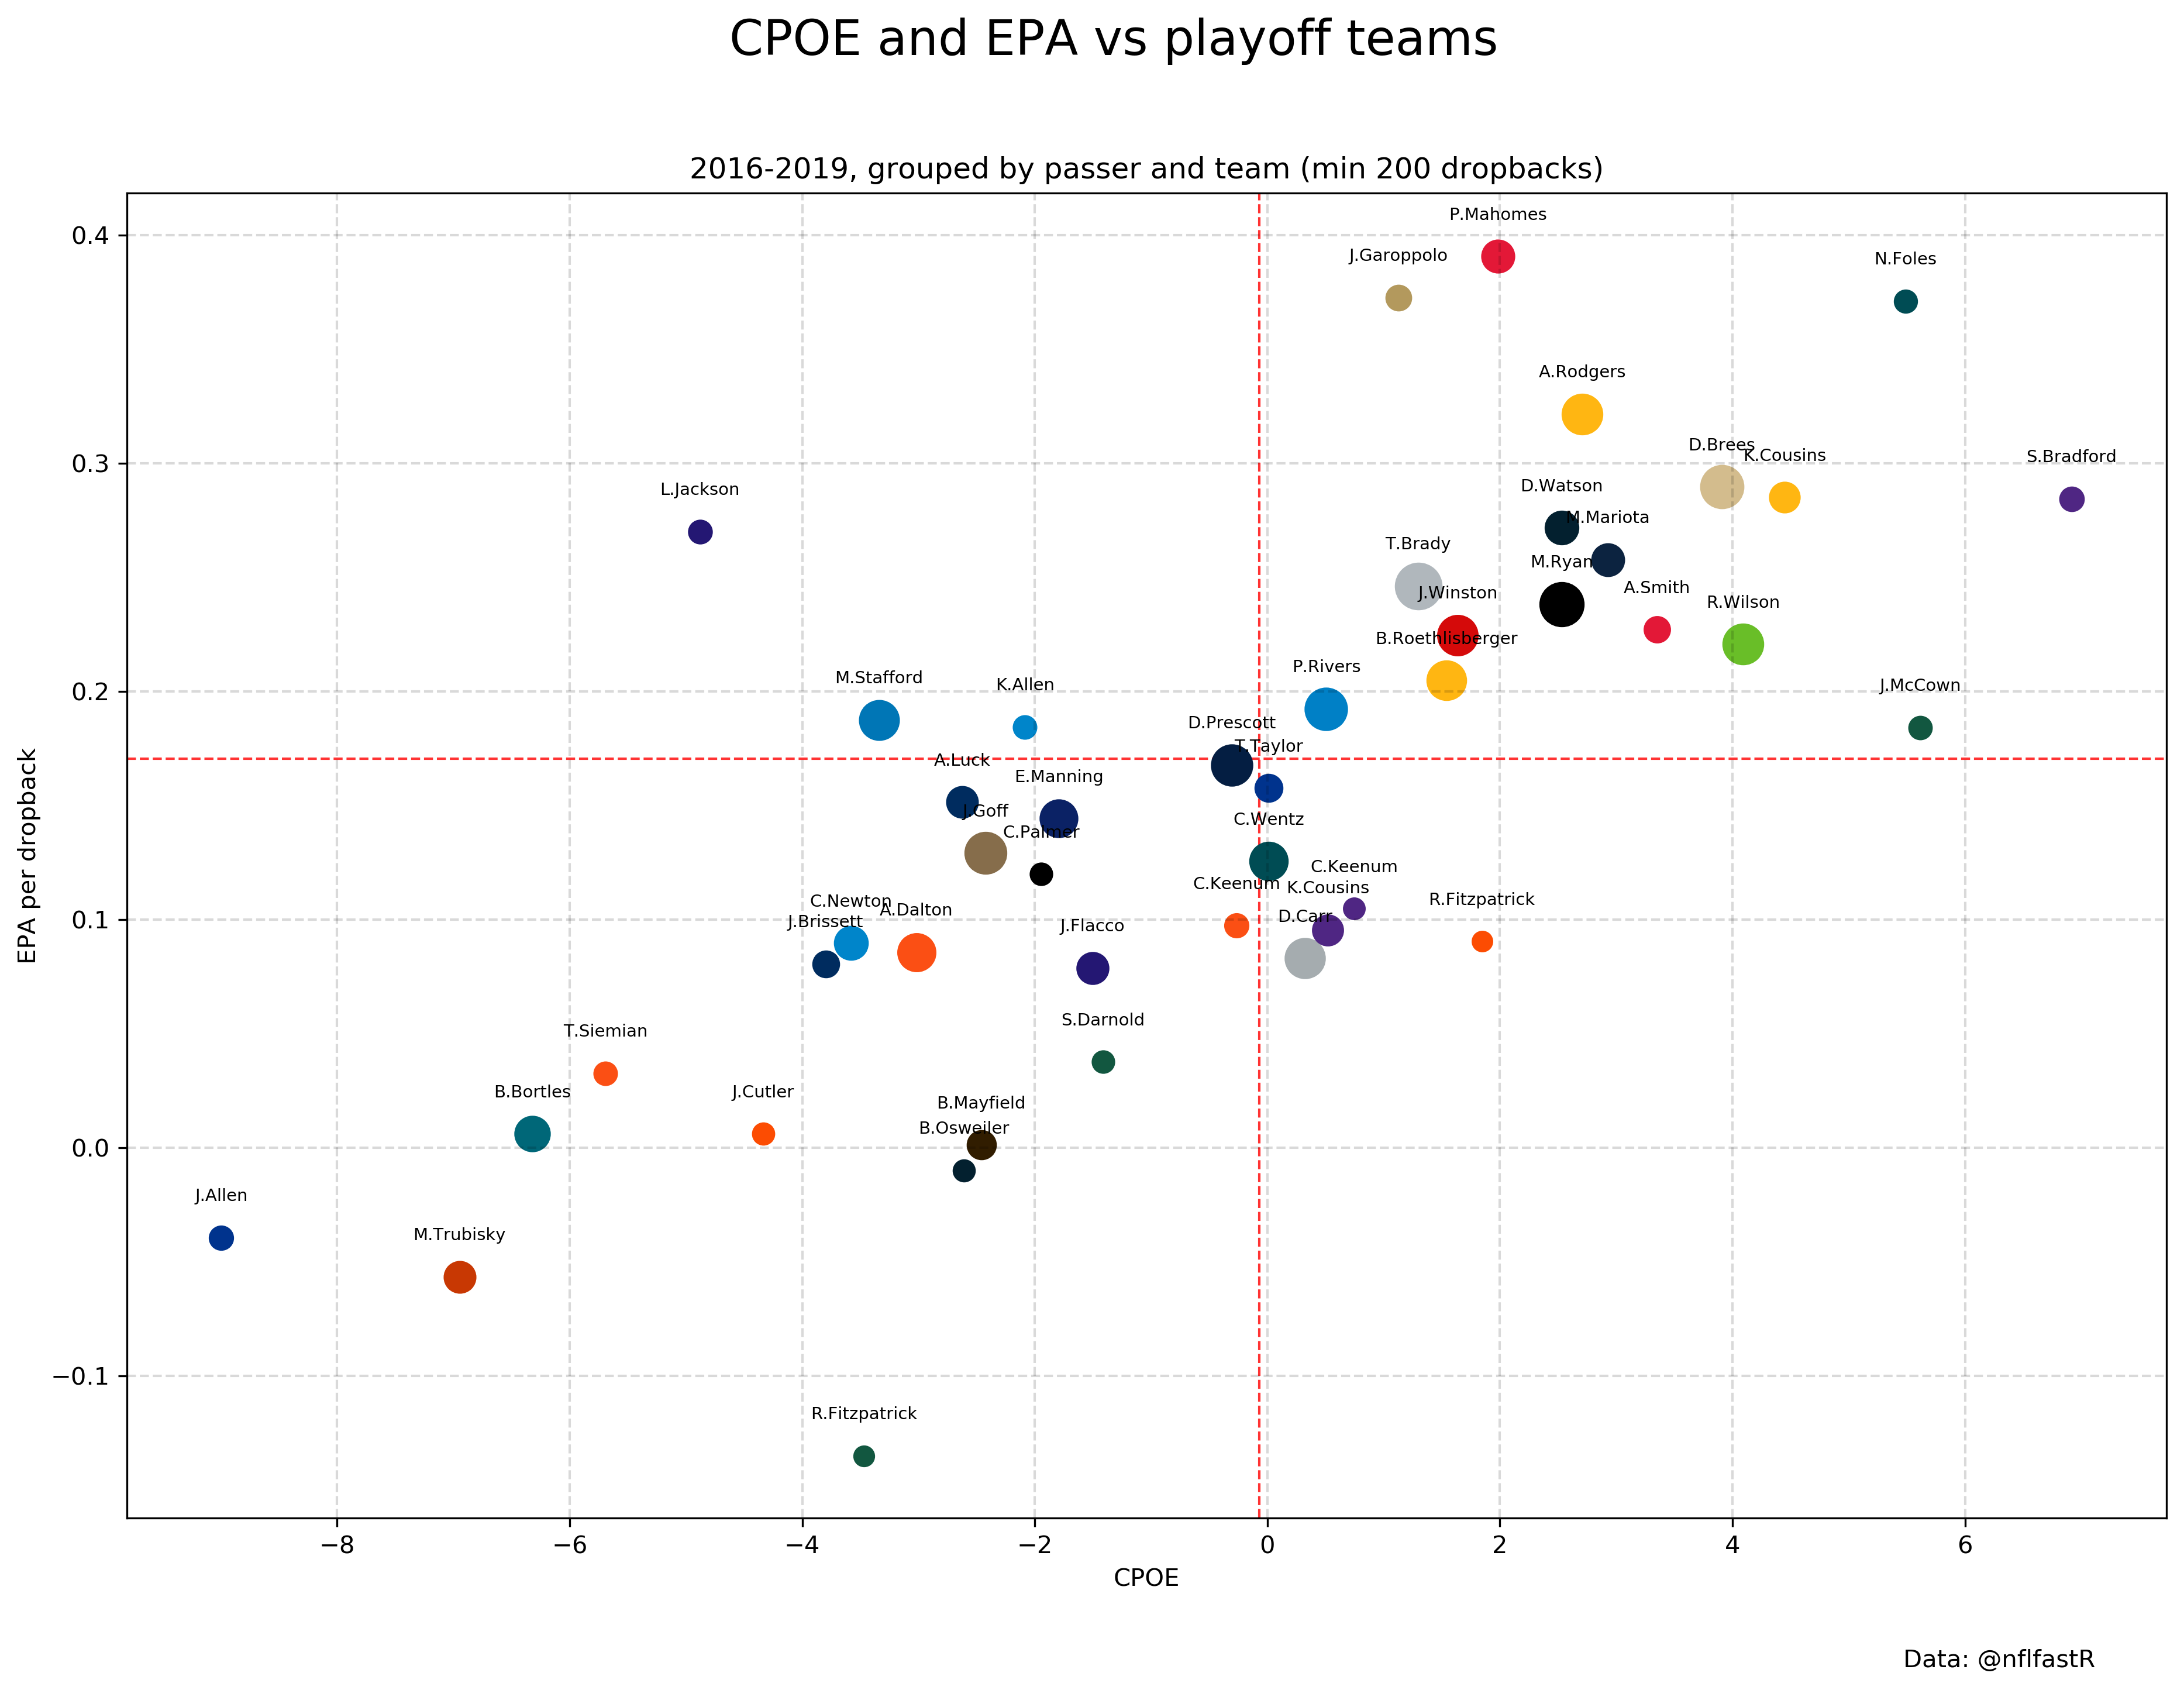

In [25]:
# adjusted axvline and axhline to weight each dropback equally rather than weight each QB equally
scale = 0.3
mean_epa = np.average(epa_list, weights=dropbacks_list)
mean_cpoe = np.average(cpoe_list, weights=dropbacks_list)
plt.figure(figsize=(15,10), dpi=300)
for i in range(len(qbs)):
    color = team_colors_primary[team_list[i]]
    plt.scatter(cpoe_list[i], epa_list[i], dropbacks_list[i]*scale, color)
    plt.annotate(qb_list[i], (cpoe_list[i], epa_list[i]), textcoords='offset points', fontsize=7, xytext=(0,15), ha='center')
plt.axvline(mean_cpoe, color='r', linestyle='--', linewidth='1', alpha=0.8, zorder=0)
plt.axhline(mean_epa, color='r', linestyle='--', linewidth='1', alpha=0.8, zorder=0)
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.15)
plt.suptitle('CPOE and EPA vs playoff teams', fontsize=20)
plt.title('2016-2019, grouped by passer and team (min 200 dropbacks)')
plt.xlabel('CPOE')
plt.ylabel('EPA per dropback')
plt.figtext(.8,.04,'Data: @nflfastR', fontsize=10)
plt.savefig('against_playoff_teams.png')
plt.show()